In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

root_indices = [i for i in range(X_train.shape[1])]

In [ ]:
import numpy as np

def entropy(y):
    h = 0
    if hasattr(y, '__len__') and len(y) != 0:
        y = np.array(y)
        p1 = len(y[y == 1]) / len(y)
        if p1 != 0 and p1 != 1:
            h = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
    return h

def split(x, nodes, feature):
    left, right = [], []
    for i in nodes:
        if x[i][feature] == 1:
            left.append(i)
        else:
            right.append(i)
    return right, left

def _informationGain(x, y, node_indices, feature):
    right, left = split(x, node_indices, feature)
    yright = y[right]
    yleft = y[left]

    ig = 0
    wr = len(right) / (len(right) + len(left))
    wl = len(left) / (len(right) + len(left))

    node_entropy = entropy(y[node_indices])
    left_entropy = entropy(yleft)
    right_entropy = entropy(yright)
    ig = node_entropy - ((wl * left_entropy) + (wr * right_entropy))
    return ig

def get_best_split(x, y, node_indices):
    n = x.shape[1]
    max_ig = -1
    best_feature = None
    for i in range(n):
        ig = _informationGain(x, y, node_indices, i)
        if ig > max_ig:
            max_ig = ig
            best_feature = i
    return best_feature

def is_leaf(y):
    return len(set(y)) == 1

tree = []

def build_tree_recursive(x, y, node_indices, branch_name, max_depth, current_depth):
    if current_depth == max_depth or len(node_indices) == 0 or is_leaf(y[node_indices]):
        prediction = 1 if np.sum(y[node_indices]) > len(y[node_indices]) / 2 else 0
        tree.append({"type": "leaf", "prediction": prediction, "depth": current_depth, "branch": branch_name, "indices": node_indices})
        return

    feature = get_best_split(x, y, node_indices)
    if feature is None:
        prediction = 1 if np.sum(y[node_indices]) > len(y[node_indices]) / 2 else 0
        tree.append({"type": "leaf", "prediction": prediction, "depth": current_depth, "branch": branch_name, "indices": node_indices})
        return

    right, left = split(x, node_indices, feature)

    tree.append({"type": "node", "feature": feature, "depth": current_depth, "branch": branch_name, "indices": node_indices})
    current_node_index = len(tree) - 1

    if left:
        tree[current_node_index]["left"] = len(tree)
        build_tree_recursive(x, y, left, "Left", max_depth, current_depth + 1)
    if right:
        tree[current_node_index]["right"] = len(tree)
        build_tree_recursive(x, y, right, "Right", max_depth, current_depth + 1)

def predict_single(x, node_index=0):
    if node_index >= len(tree):
        return None
    node = tree[node_index]

    if node["type"] == "leaf":
        return node["prediction"]

    feature = node["feature"]
    if x[feature] == 1:
        return predict_single(x, node["left"])
    else:
        return predict_single(x, node["right"])

def predict(X):
    return [predict_single(x) for x in X]


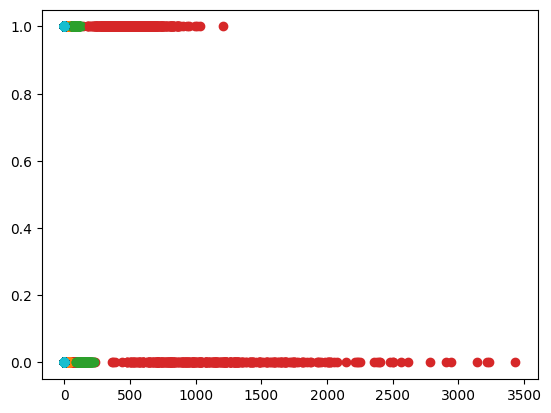

In [ ]:
plt.plot(X_train,y_train,'o')
plt.show()

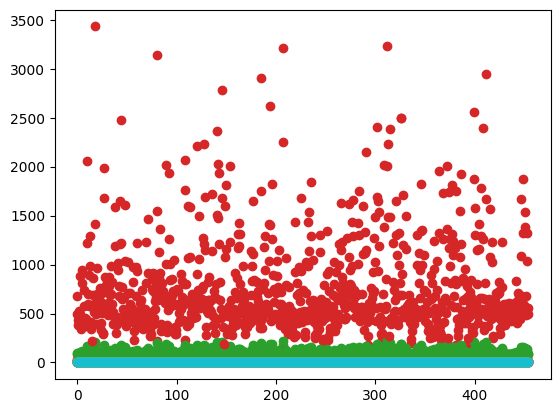

In [ ]:
plt.plot(X_train,'o')
plt.show()

In [ ]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=100, current_depth=0)
print(tree)


[{'type': 'node', 'feature': 0, 'depth': 0, 'branch': 'Root', 'indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'right': 1}, {'type': 'node', 'feature': 0, 'depth': 1, 'branch': 'Right', 'indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'right': 2}, {'type': 'node', 'feature': 0, 'depth': 2, 'branch': 'Right', 'indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'right': 3}, {'type': 'node', 'feature': 0, 'depth': 3, 'branch': 'Right', 'indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'right': 4}, {'type': 'node', 'feature': 0, 'depth': 4, 'branch': 'Right', 'indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'right': 5}, {'type': '

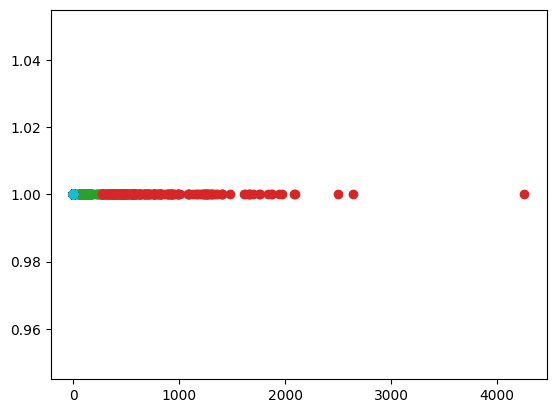

In [ ]:
y_pred=predict(X_test)
plt.plot(X_test,y_pred,'o')
plt.show()

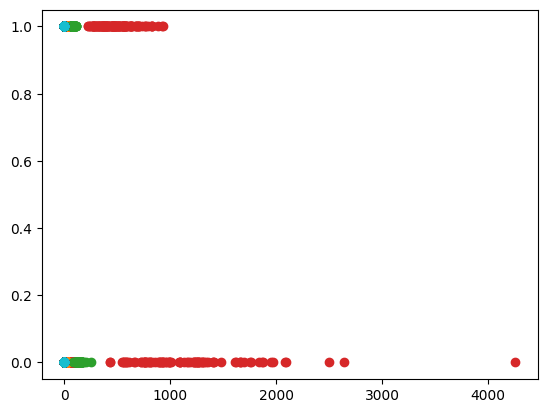

In [ ]:
plt.plot(X_test,y_test,'o')
plt.show()

In [ ]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, y_pred)
print(acc)

0.0
